In [2]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
#Importacion de bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#Carga del primer dataset y visualización
data1 = pd.read_csv("D:/Bibliotecas/Documentos/UNAD/16 04 2024/Analisis de Datos/Momento Intermedio/Tarea 3/Anexo 2 - Dataset Vehicle/car data.csv")
data1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
#Importacion de bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#Carga de los demás dataset
data2 = pd.read_csv("D:/Bibliotecas/Documentos/UNAD/16 04 2024/Analisis de Datos/Momento Intermedio/Tarea 3/Anexo 2 - Dataset Vehicle/CAR DETAILS FROM CAR DEKHO.csv")
data3 = pd.read_csv("D:/Bibliotecas/Documentos/UNAD/16 04 2024/Analisis de Datos/Momento Intermedio/Tarea 3/Anexo 2 - Dataset Vehicle/Car details v3.csv")
data4 = pd.read_csv("D:/Bibliotecas/Documentos/UNAD/16 04 2024/Analisis de Datos/Momento Intermedio/Tarea 3/Anexo 2 - Dataset Vehicle/Car details v4.csv")

# Explorar las primeras filas y la información de cada dataset
print(data1.head())
print(data1.info())

print(data2.head())
print(data2.info())

print(data3.head())
print(data3.info())

print(data4.head())
print(data4.info())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non

In [10]:
# Renombrar columnas para unificar
data1 = data1.rename(columns={
    "Car_Name": "name",
    "Year": "year",
    "Selling_Price": "selling_price",
    "Present_Price": "present_price",
    "Kms_Driven": "km_driven",
    "Fuel_Type": "fuel",
    "Seller_Type": "seller_type",
    "Transmission": "transmission",
    "Owner": "owner"
})

# Columnas comunes para unificar
common_columns = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']
data_combined = pd.concat([data1[common_columns], data2[common_columns], data3[common_columns + ['mileage', 'engine', 'max_power', 'seats']]], ignore_index=True)

# Verificar valores nulos en el dataset combinado
print(data_combined.isnull().sum())

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage          4862
engine           4862
max_power        4856
seats            4862
dtype: int64


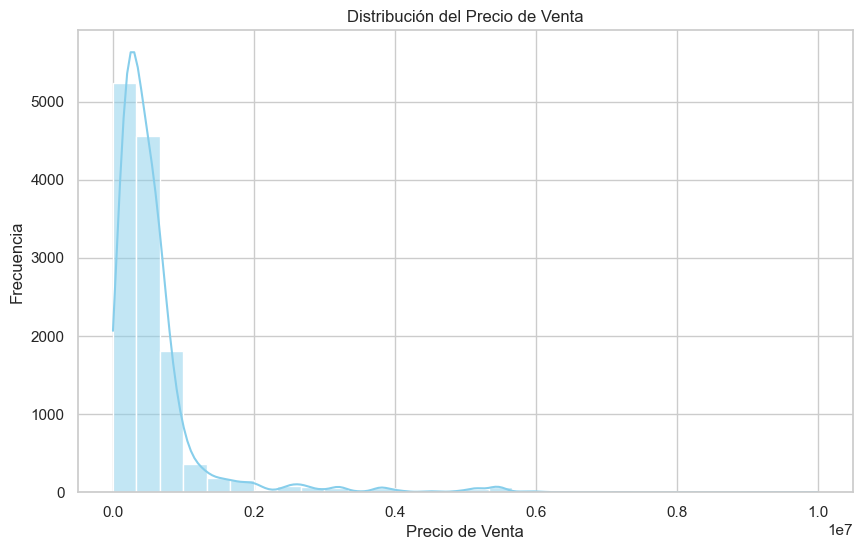

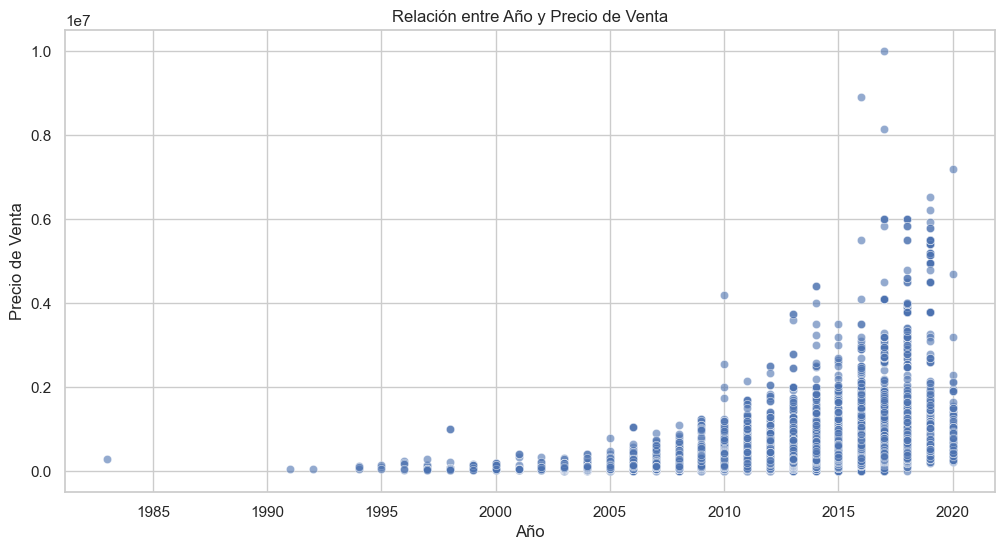

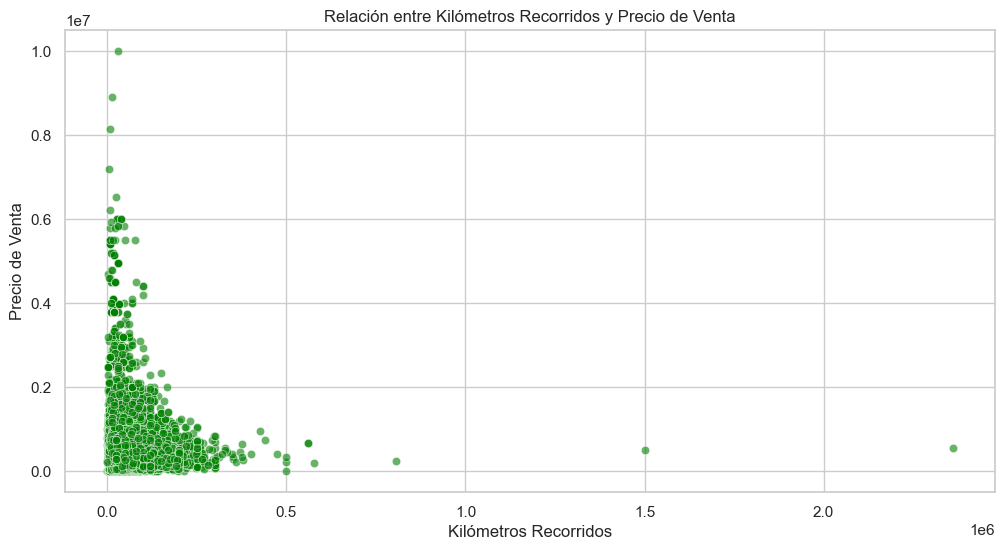

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Distribución del Precio de Venta
plt.figure(figsize=(10, 6))
sns.histplot(data_combined['selling_price'], bins=30, kde=True, color="skyblue")
plt.title("Distribución del Precio de Venta")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

# Relación entre el año y el precio de venta
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='selling_price', data=data_combined, alpha=0.6)
plt.title("Relación entre Año y Precio de Venta")
plt.xlabel("Año")
plt.ylabel("Precio de Venta")
plt.show()

# Relación entre kilómetros recorridos y precio de venta
plt.figure(figsize=(12, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=data_combined, alpha=0.6, color="green")
plt.title("Relación entre Kilómetros Recorridos y Precio de Venta")
plt.xlabel("Kilómetros Recorridos")
plt.ylabel("Precio de Venta")
plt.show()